In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from IPython.display import display
%matplotlib inline
from scipy import stats
##%%capture                
##! pip install seaborn    
import seaborn as sns
%matplotlib inline    
!pip install Folium
import folium
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

pd.options.display.float_format = '{:20,.3f}'.format
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 1000
np.set_printoptions(precision=3)

     |████████████████████████████████| 92kB 12.6MB/s eta 0:00:01


Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

In [2]:
columns_used = ['borough', 'city', 'complaint_type', 'created_date', 'incident_address', 'incident_zip', 'latitude', 'location_type', 'longitude','street_name', 'unique_key']

In [6]:
df_311 = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status', parse_dates = ['created_date'], usecols = columns_used)

In [7]:
df_311.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-17 16:57:37,44081416,HEAT/HOT WATER,"10,463.000",225 WEST 232 STREET,WEST 232 STREET,BRONX,BRONX,40.880,-73.904,RESIDENTIAL BUILDING
1,2019-10-17 18:04:24,44082732,HEAT/HOT WATER,"10,032.000",261 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.844,-73.941,RESIDENTIAL BUILDING
2,2019-10-17 22:40:04,44081467,HEAT/HOT WATER,"10,033.000",350 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.847,-73.940,RESIDENTIAL BUILDING
3,2019-10-17 09:47:43,44080113,HEAT/HOT WATER,"11,211.000",276 SOUTH 1 STREET,SOUTH 1 STREET,BROOKLYN,BROOKLYN,40.712,-73.956,RESIDENTIAL BUILDING
4,2019-10-17 10:24:21,44081316,HEAT/HOT WATER,"10,021.000",530 EAST 76 STREET,EAST 76 STREET,NEW YORK,MANHATTAN,40.769,-73.951,RESIDENTIAL BUILDING


In [13]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_26ef0624fc5b4082a8f44a07ee68ecfc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='q4B5JndOXQnDVlqMtjsnZJSlbX6m_94UA1KBB1CrxPf_',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_26ef0624fc5b4082a8f44a07ee68ecfc.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-ldlvsth6hbsxat',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.df_data_0 = pd.read_csv(body)
df_BX = pd.read_csv(body)
df_data_BX_1 = df_BX[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_data_BX_1 = df_data_BX_1.dropna()
df_BX.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BX,2260,1,201,19.000,"1,022.000",7.000,8.000,"10,454.000",L029,40.000,23.000,"4,700.000",2.000,1.000,2A,122 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,nan,nan,nan,N,Z9,nan,0,NaN,122 BRUCKNER PARTNERS,15000,0,0,0,0,0,0,0,0,0,7,1,0.000,0,0,75.000,200.000,0.000,0.000,NaN,0.000,N,3.000,0.000,130500,161100,0,0,0,0,0,NaN,NaN,0.000,6.020,5.000,6.500,2,2022600001,0,19,"1,005,957.000","232,162.000",6b,NaN,209S016,"20,901.000",E-143,0.000,NaN,1,nan,nan,18V1
1,BX,2260,4,201,19.000,"1,022.000",7.000,8.000,"10,454.000",L029,40.000,23.000,"4,700.000",2.000,1.000,2A,126 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,nan,nan,nan,N,G5,7.000,0,NaN,24 INDIAN HEAD HOLDIN,13770,752,752,0,272,0,0,480,0,0,2,2,1.000,0,1,137.580,100.000,16.000,16.000,NaN,0.000,N,5.000,0.000,117000,326700,0,0,1931,1994,0,NaN,NaN,0.050,6.020,5.000,6.500,2,2022600004,0,19,"1,006,076.000","232,156.000",6b,NaN,209S016,"20,901.000",E-143,0.000,NaN,1,nan,nan,18V1
2,BX,2260,10,201,19.000,"1,022.000",7.000,8.000,"10,454.000",L029,40.000,23.000,"4,700.000",2.000,1.000,2A,138 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,nan,nan,nan,N,F5,6.000,0,P,ANJOST CORP,35000,39375,39375,0,0,0,0,0,39375,0,2,1,2.000,0,1,175.000,200.000,175.000,200.000,NaN,0.000,N,4.000,0.000,153000,879300,0,0,1931,0,0,NaN,NaN,1.130,6.020,5.000,6.500,2,2022600010,0,19,"1,006,187.000","232,036.000",6b,NaN,209S016,"20,901.000",E-143,0.000,NaN,1,nan,nan,18V1
3,BX,2260,17,201,19.000,"1,022.000",7.000,8.000,"10,454.000",L029,40.000,23.000,"4,700.000",2.000,1.000,2A,144 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,nan,nan,nan,N,C1,2.000,0,NaN,144 BRUCKNER LLC,2500,12500,0,12500,0,0,0,0,0,0,2,1,5.000,15,15,25.000,100.000,25.000,85.000,NaN,0.000,N,5.000,0.000,51300,332550,0,0,1931,2001,0,NaN,NaN,5.000,6.020,5.000,6.500,2,2022600017,0,19,"1,006,299.000","232,033.000",6b,NaN,209S016,"20,901.000",E-143,0.000,NaN,1,nan,nan,18V1
4,BX,2260,18,201,19.000,"1,022.000",7.000,8.000,"10,454.000",L029,40.000,23.000,"4,700.000",2.000,1.000,2A,148 BRUCKNER BOULEVARD,M1-5/R8A,NaN,NaN,NaN,NaN,NaN,MX-1,nan,nan,nan,N,C7,2.000,0,P,148 BRUCKNER LLC,1875,8595,1719,6876,0,1719,0,0,0,0,2,1,5.000,8,10,25.000,75.000,25.000,70.000,NaN,0.000,N,3.000,2.000,17490,125304,0,52349,1920,2009,0,NaN,NaN,4.580,6.020,5.000,6.500,2,2022600018,0,19,"1,006,363.000","232,040.000",6b,NaN,209S016,"20,901.000",E-143,0.000,NaN,1,nan,nan,18V1


In [14]:

body = client_26ef0624fc5b4082a8f44a07ee68ecfc.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-ldlvsth6hbsxat',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.df_data_0 = pd.read_csv(body)
df_BK = pd.read_csv(body)
df_data_BK_1 = df_BK[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_data_BK_1 = df_data_BK_1.dropna()
df_BK.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.000,nan,13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,JOHN STREET,M3-1,M1-4/R8A,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,Y,V1,11.000,1,P,BROOKLYN BRIDGE PARK,151930,0,0,0,0,0,0,0,0,0,4,0,0.000,0,0,206.250,337.420,0.000,0.000,NaN,0.000,Y,5.000,5.000,1127700,1127700,0,0,0,0,0,DUMBO Historic District,NaN,0.000,0.000,2.000,0.000,3,3000010001,0,21,nan,nan,12d,NaN,302 007,"30,101.000",NaN,"3,000,010,001.000",11/26/2013,1,1.000,1.000,18V1
1,BK,1,50,302,21.000,"2,000.000",13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,10 JAY STREET,M1-4/R8A,M3-1,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,Y,O6,5.000,0,NaN,SAFDI PLAZA PROPERTY,19682,163894,163894,0,147505,16389,0,0,0,0,2,1,10.000,0,2,109.080,207.250,88.000,195.000,NaN,1.000,Y,3.000,0.000,834300,13780800,0,0,1920,1994,2015,DUMBO Historic District,NaN,8.330,5.400,2.000,6.500,3,3000010050,0,21,"987,838.000","195,989.000",12d,NaN,302 007,"30,101.000",E-231,0.000,NaN,1,1.000,1.000,18V1
2,BK,1,7501,302,21.000,"2,000.000",13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",1.000,2.000,NaN,1 JOHN STREET,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,RM,4.000,1,NaN,NaN,0,102534,4686,97848,0,4686,0,0,0,0,7,1,12.000,42,44,0.000,0.000,0.000,0.000,NaN,0.000,N,0.000,5.000,389688,12347546,0,0,0,0,0,NaN,NaN,0.000,0.000,2.000,0.000,3,3000017501,3819,21,"987,624.000","195,992.000",12d,NaN,302 007,"30,101.000",NaN,"3,000,010,002.000",03/04/2016,1,1.000,1.000,18V1
3,BK,3,1,302,21.000,"3,002.000",13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,JAY STREET,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,U4,7.000,1,NaN,CONSOLIDED EDISON CO/,387060,0,0,0,0,0,0,0,0,0,7,15,0.000,0,0,"1,051.000",469.000,0.000,0.000,NaN,0.000,Y,5.000,0.000,0,0,0,0,0,0,0,NaN,NaN,0.000,0.000,2.000,0.000,3,3000030001,0,21,"988,568.000","196,151.000",12d,NaN,302 007,"30,101.000",NaN,0.000,NaN,1,1.000,1.000,18V1
4,BK,3,5,302,21.000,nan,13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,JAY STREET,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,T2,7.000,0,C,NYC DSBS,6384,0,0,0,0,0,0,0,0,0,7,0,0.000,0,0,0.000,0.000,0.000,0.000,NaN,0.000,N,8.000,5.000,22050,22050,22050,22050,0,0,0,DUMBO Historic District,NaN,0.000,0.000,2.000,0.000,3,3000030005,0,21,nan,nan,12d,NaN,302 007,"30,101.000",NaN,0.000,NaN,4,1.000,1.000,18V1


In [15]:

body = client_26ef0624fc5b4082a8f44a07ee68ecfc.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-ldlvsth6hbsxat',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.df_data_0 = pd.read_csv(body)
df_MN = pd.read_csv(body)
df_data_MN_1 = df_MN[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_data_MN_1 = df_data_MN_1.dropna()
df_BK.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.000,nan,13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,JOHN STREET,M3-1,M1-4/R8A,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,Y,V1,11.000,1,P,BROOKLYN BRIDGE PARK,151930,0,0,0,0,0,0,0,0,0,4,0,0.000,0,0,206.250,337.420,0.000,0.000,NaN,0.000,Y,5.000,5.000,1127700,1127700,0,0,0,0,0,DUMBO Historic District,NaN,0.000,0.000,2.000,0.000,3,3000010001,0,21,nan,nan,12d,NaN,302 007,"30,101.000",NaN,"3,000,010,001.000",11/26/2013,1,1.000,1.000,18V1
1,BK,1,50,302,21.000,"2,000.000",13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,10 JAY STREET,M1-4/R8A,M3-1,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,Y,O6,5.000,0,NaN,SAFDI PLAZA PROPERTY,19682,163894,163894,0,147505,16389,0,0,0,0,2,1,10.000,0,2,109.080,207.250,88.000,195.000,NaN,1.000,Y,3.000,0.000,834300,13780800,0,0,1920,1994,2015,DUMBO Historic District,NaN,8.330,5.400,2.000,6.500,3,3000010050,0,21,"987,838.000","195,989.000",12d,NaN,302 007,"30,101.000",E-231,0.000,NaN,1,1.000,1.000,18V1
2,BK,1,7501,302,21.000,"2,000.000",13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",1.000,2.000,NaN,1 JOHN STREET,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,RM,4.000,1,NaN,NaN,0,102534,4686,97848,0,4686,0,0,0,0,7,1,12.000,42,44,0.000,0.000,0.000,0.000,NaN,0.000,N,0.000,5.000,389688,12347546,0,0,0,0,0,NaN,NaN,0.000,0.000,2.000,0.000,3,3000017501,3819,21,"987,624.000","195,992.000",12d,NaN,302 007,"30,101.000",NaN,"3,000,010,002.000",03/04/2016,1,1.000,1.000,18V1
3,BK,3,1,302,21.000,"3,002.000",13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,JAY STREET,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,U4,7.000,1,NaN,CONSOLIDED EDISON CO/,387060,0,0,0,0,0,0,0,0,0,7,15,0.000,0,0,"1,051.000",469.000,0.000,0.000,NaN,0.000,Y,5.000,0.000,0,0,0,0,0,0,0,NaN,NaN,0.000,0.000,2.000,0.000,3,3000030001,0,21,"988,568.000","196,151.000",12d,NaN,302 007,"30,101.000",NaN,0.000,NaN,1,1.000,1.000,18V1
4,BK,3,5,302,21.000,nan,13.000,33.000,"11,201.000",L118,84.000,36.000,"1,000.000",3.000,2.000,1B,JAY STREET,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,T2,7.000,0,C,NYC DSBS,6384,0,0,0,0,0,0,0,0,0,7,0,0.000,0,0,0.000,0.000,0.000,0.000,NaN,0.000,N,8.000,5.000,22050,22050,22050,22050,0,0,0,DUMBO Historic District,NaN,0.000,0.000,2.000,0.000,3,3000030005,0,21,nan,nan,12d,NaN,302 007,"30,101.000",NaN,0.000,NaN,4,1.000,1.000,18V1


In [16]:

body = client_26ef0624fc5b4082a8f44a07ee68ecfc.get_object(Bucket='datascienceandmachinelearningcaps-donotdelete-pr-ldlvsth6hbsxat',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.df_data_0 = pd.read_csv(body)
df_SI = pd.read_csv(body)
df_data_SI_1 = df_MN[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 
'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]
df_data_SI_1 = df_data_SI_1.dropna()
df_SI.head()


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCenterDistrict,HealthArea,SanitBoro,SanitDistrict,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,SI,1,10,501,3.000,"2,000.000",31.000,49.000,"10,301.000",L078,120.000,51.000,500.000,5.000,1.000,2C,139 BAY STREET,C4-2,NaN,nan,nan,NaN,NaN,SG,nan,nan,nan,N,E1,6.000,0.000,NaN,139 BAY POINTE PROPER,"5,716.000","18,965.000","18,965.000",0.000,0.000,"6,965.000",0.000,"12,000.000",0.000,0.000,2.000,1.000,4.000,0.000,1.000,112.580,84.000,100.000,50.000,NaN,1.000,Y,5.000,0.000,"167,400.000","670,950.000",0.000,0.000,"1,884.000","2,000.000",0.000,NaN,NaN,3.320,2.430,3.400,4.800,5.000,"5,000,010,010.000",0.000,3.000,"963,297.000","171,951.000",21c,NaN,501 017,"50,101.000",NaN,0.000,NaN,1.000,nan,nan,18V1
1,SI,1,17,501,3.000,nan,31.000,49.000,"10,301.000",L078,120.000,51.000,500.000,nan,nan,NaN,BAY STREET,C4-2,NaN,nan,nan,NaN,NaN,SG,nan,nan,nan,N,V1,11.000,0.000,NaN,139 BAY POINTE PROPER,780.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,26.000,35.000,0.000,0.000,NaN,0.000,Y,5.000,5.000,"13,950.000","13,950.000",0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,2.430,3.400,4.800,5.000,"5,000,010,017.000",0.000,3.000,nan,nan,21c,NaN,501 017,"50,101.000",NaN,0.000,NaN,1.000,nan,nan,18V1
2,SI,1,18,501,3.000,nan,31.000,49.000,"10,301.000",L078,120.000,51.000,500.000,nan,nan,NaN,BAY STREET,C4-2,NaN,nan,nan,NaN,NaN,SG,nan,nan,nan,N,V1,11.000,0.000,NaN,139 BAY POINTE PROPER,520.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,26.000,25.000,0.000,0.000,NaN,0.000,Y,5.000,5.000,"9,450.000","9,450.000",0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,2.430,3.400,4.800,5.000,"5,000,010,018.000",0.000,3.000,nan,nan,21c,NaN,501 017,"50,101.000",NaN,0.000,NaN,1.000,nan,nan,18V1
3,SI,1,19,501,3.000,nan,31.000,49.000,"10,301.000",L078,120.000,51.000,500.000,nan,nan,NaN,BAY STREET,C4-2,NaN,nan,nan,NaN,NaN,SG,nan,nan,nan,N,V1,11.000,0.000,NaN,139 BAY STREET REALTY,278.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,39.000,15.000,0.000,0.000,NaN,0.000,Y,5.000,5.000,450.000,450.000,0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,2.430,3.400,4.800,5.000,"5,000,010,019.000",0.000,3.000,nan,nan,21c,NaN,501 017,"50,101.000",NaN,0.000,NaN,1.000,nan,nan,18V1
4,SI,1,21,501,3.000,nan,31.000,49.000,"10,301.000",L078,120.000,51.000,500.000,nan,nan,NaN,BAY STREET,C4-2,NaN,nan,nan,NaN,NaN,SG,nan,nan,nan,N,V1,11.000,0.000,P,K MANDEL,"6,302.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,75.000,82.000,0.000,0.000,NaN,0.000,Y,5.000,5.000,"99,450.000","99,450.000",0.000,0.000,0.000,0.000,0.000,NaN,NaN,0.000,2.430,3.400,4.800,5.000,"5,000,010,021.000",0.000,3.000,nan,nan,21c,NaN,501 017,"50,101.000",NaN,0.000,NaN,1.000,nan,nan,18V1


In [18]:
frames = [df_data_BK_1, df_data_BX_1, df_data_MN_1, df_data_SI_1]
df_pluto = pd.concat(frames)
df_pluto.index = range(len(df_pluto.index))
df_pluto.shape

(444954, 20)

In [19]:
print(df_311.columns)
print(df_pluto.columns)

Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'city', 'borough', 'latitude',
       'longitude', 'location_type'],
      dtype='object')
Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')


In [20]:
#merging HEATING and HEAT/HOT WATER as one feature
df_311['complaint_type'] = np.where(df_311['complaint_type']=='HEATING','HEAT/HOT WATER',df_311['complaint_type'])
df_complaint = df_311.loc[df_311['complaint_type']=='HEAT/HOT WATER'].dropna()
df_complaint.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,city,borough,latitude,longitude,location_type
0,2019-10-17 16:57:37,44081416,HEAT/HOT WATER,"10,463.000",225 WEST 232 STREET,WEST 232 STREET,BRONX,BRONX,40.880,-73.904,RESIDENTIAL BUILDING
1,2019-10-17 18:04:24,44082732,HEAT/HOT WATER,"10,032.000",261 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.844,-73.941,RESIDENTIAL BUILDING
2,2019-10-17 22:40:04,44081467,HEAT/HOT WATER,"10,033.000",350 FT WASHINGTON AVENUE,FT WASHINGTON AVENUE,NEW YORK,MANHATTAN,40.847,-73.940,RESIDENTIAL BUILDING
3,2019-10-17 09:47:43,44080113,HEAT/HOT WATER,"11,211.000",276 SOUTH 1 STREET,SOUTH 1 STREET,BROOKLYN,BROOKLYN,40.712,-73.956,RESIDENTIAL BUILDING
4,2019-10-17 10:24:21,44081316,HEAT/HOT WATER,"10,021.000",530 EAST 76 STREET,EAST 76 STREET,NEW YORK,MANHATTAN,40.769,-73.951,RESIDENTIAL BUILDING


In [21]:
df_target = df_pluto[['Address']].isin(df_complaint['incident_address'].unique())
print(df_target['Address'].sum())
df_target = (df_target['Address'])*1
df_target.dtypes

52718


dtype('int64')

In [22]:
df_pluto.loc[:,'target'] = df_target
df_pluto.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,target
0,10 JAY STREET,163894,195.000,8.330,2.000,6.500,50,19682,207.250,1,10.000,147505,0,5.400,16389,1920,1994,"11,201.000","195,989.000","987,838.000",0
1,1 JOHN STREET,102534,0.000,0.000,2.000,0.000,7501,0,0.000,1,12.000,0,97848,0.000,4686,0,0,"11,201.000","195,992.000","987,624.000",0
2,JAY STREET,0,0.000,0.000,2.000,0.000,1,387060,469.000,15,0.000,0,0,0.000,0,0,0,"11,201.000","196,151.000","988,568.000",0
3,135 MARSHALL STREET,0,0.000,0.000,2.000,0.000,1,0,346.000,4,0.000,0,0,0.000,0,0,0,"11,201.000","196,266.000","989,346.000",0
4,1 HUDSON AVENUE,0,0.000,0.000,2.000,0.000,1,323307,657.000,15,0.000,0,0,0.000,0,0,0,"11,201.000","196,040.000","989,745.000",0


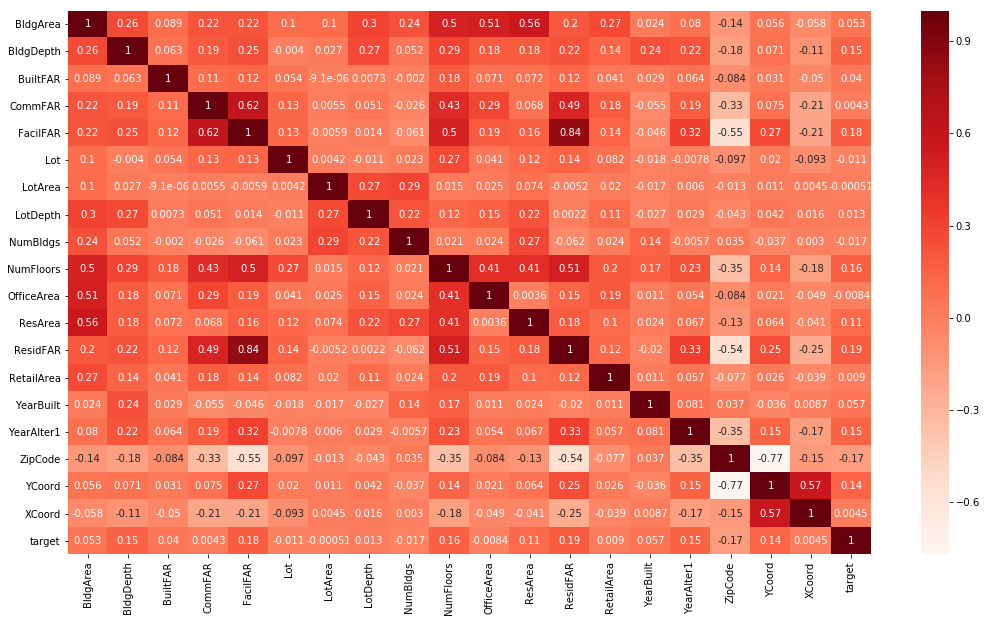

In [23]:
# using Pearson correlation
plt.figure(figsize=(18,10))
cor = df_pluto.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()


In [24]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features. Here I set the threshold to be 0.12
relevant_features = cor_target[cor_target>0.12]
relevant_features

BldgDepth                   0.146
FacilFAR                    0.176
NumFloors                   0.165
ResidFAR                    0.185
YearAlter1                  0.145
ZipCode                     0.167
YCoord                      0.138
target                      1.000
Name: target, dtype: float64

In [25]:
print(df_pluto[["ResidFAR","FacilFAR"]].corr())

                     ResidFAR             FacilFAR
ResidFAR                1.000                0.838
FacilFAR                0.838                1.000


In [26]:
important_feature = ['BldgDepth', 'NumFloors', 'ResidFAR', 'ZipCode','target']
df_selected_feature = df_pluto[important_feature]
df_selected_feature.head()

,BldgDepth,NumFloors,ResidFAR,ZipCode,target
0,195.000,10.000,5.400,"11,201.000",0
1,0.000,12.000,0.000,"11,201.000",0
2,0.000,0.000,0.000,"11,201.000",0
3,0.000,0.000,0.000,"11,201.000",0
4,0.000,0.000,0.000,"11,201.000",0


In [27]:
# data for features set and target

X = df_pluto.drop(["Address", "target", "XCoord", "YCoord"],1)
y = df_pluto["target"]

# feature labels
feat_labels = list(X.columns)

# Split the data into 30% test and 70% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [29]:
# Create a random forest classifier
clf = RandomForestClassifier(random_state=0, n_jobs=2)

# Train the classifier
clf.fit(X_train, y_train)

importances = clf.feature_importances_

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('BldgArea', 0.08296732349865238)
('BldgDepth', 0.07461319258755425)
('BuiltFAR', 0.11244821809668744)
('CommFAR', 0.00926430014603192)
('FacilFAR', 0.025451865127045413)
('Lot', 0.153701924605063)
('LotArea', 0.07549886911874429)
('LotDepth', 0.04898920190071501)
('NumBldgs', 0.010057403668367017)
('NumFloors', 0.031982603200132166)
('OfficeArea', 0.00990753726801517)
('ResArea', 0.1490235139399974)
('ResidFAR', 0.03166642873997076)
('RetailArea', 0.022302151905823693)
('YearBuilt', 0.06391275890449045)
('YearAlter1', 0.03143769329495106)
('ZipCode', 0.06677501399775859)


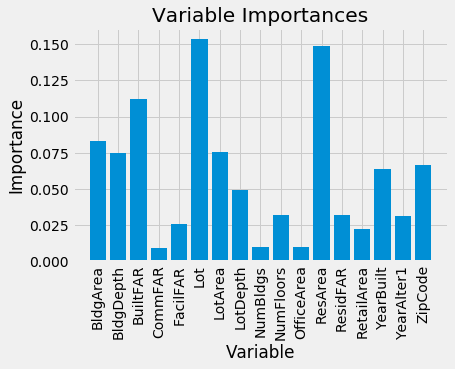

In [30]:
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feat_labels, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [31]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.04
sfm = SelectFromModel(clf, threshold=0.04)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.04)

In [32]:
#Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

BldgArea
BldgDepth
BuiltFAR
Lot
LotArea
LotDepth
ResArea
YearBuilt
ZipCode


In [33]:
#Data Subset with important features

# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [34]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(random_state=0, n_jobs=2)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (19 Features) Model
accuracy_allFeatures = accuracy_score(y_test, y_pred)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

rmse_allFeatures = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 0.08629304726302936
Mean Squared Error: 0.08629304726302936
Root Mean Squared Error: 0.2937567824970674


In [38]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (10 Features) Model
accuracy_importantFeatures = accuracy_score(y_test, y_important_pred)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_important_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_important_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_important_pred)))  

rmse_importantFeatures = np.sqrt(metrics.mean_squared_error(y_test, y_important_pred))

Mean Absolute Error: 0.08686988246046431
Mean Squared Error: 0.08686988246046431
Root Mean Squared Error: 0.2947369716551765


In [40]:
print('accuracy_allFeatures:', accuracy_allFeatures)
print('rmse_allFeatures:', rmse_allFeatures)
print('accuracy_importantFeatures:', accuracy_importantFeatures)
print('rmse_importantFeatures:', rmse_importantFeatures)

accuracy_allFeatures: 0.9137069527369707
rmse_allFeatures: 0.2937567824970674
accuracy_importantFeatures: 0.9131301175395357
rmse_importantFeatures: 0.2947369716551765


In [ ]:
The model has an accurary of 91. Therefore, the complaint type can be predicted with 91% accuracy.